# BASIC OPERATIONS

In [164]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
data = pd.read_csv('tips.csv')

data.drop_duplicates(inplace=True)

data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


**ENCODING CATEGORICAL VARIABLES**

In [166]:
df = data.copy()

df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
df['smoker'] = df['smoker'].map({'No': 0, 'Yes': 1})
df['day'] = df['day'].map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun' : 3})
df['time'] = df['time'].map({'Lunch': 0, 'Dinner': 1})

df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,3,1,2
1,10.34,1.66,0,0,3,1,3
2,21.01,3.50,0,0,3,1,3
3,23.68,3.31,0,0,3,1,2
4,24.59,3.61,1,0,3,1,4
...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,2,1,3
240,27.18,2.00,1,1,2,1,2
241,22.67,2.00,0,1,2,1,2
242,17.82,1.75,0,0,2,1,2


# PERFORMING REGRESSION TECHNIQUES

**TRAIN-TEST SPLIT**

In [167]:
# Separating features and target variable
X = df[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = df['tip']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data for models like SVR and KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**LINEAR REGRESSION**

Linear Regression:
  MAE: 0.7642
  MSE: 1.1693
  R2 Score: 0.5201



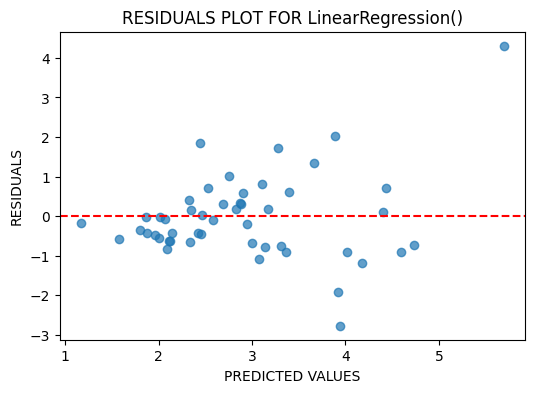

In [168]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression:")
print(f"  MAE: {mae:.4f}")
print(f"  MSE: {mse:.4f}")
print(f"  R2 Score: {r2:.4f}\n")

residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("PREDICTED VALUES")
plt.ylabel("RESIDUALS")
plt.title(f"RESIDUALS PLOT FOR {model}")
plt.show()

**RIDGE REGRESSION**

Ridge Regression:
  MAE: 0.7640
  MSE: 1.1683
  R2 Score: 0.5205



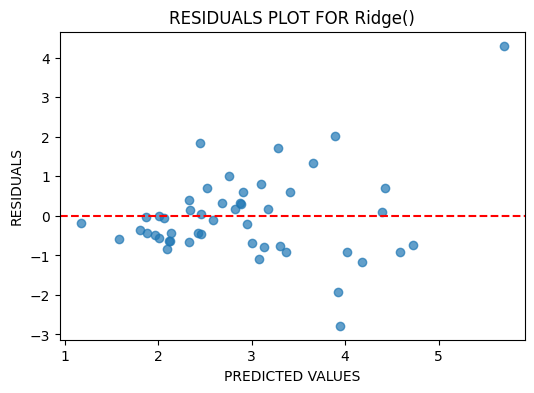

In [169]:
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression:")
print(f"  MAE: {mae:.4f}")
print(f"  MSE: {mse:.4f}")
print(f"  R2 Score: {r2:.4f}\n")

residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("PREDICTED VALUES")
plt.ylabel("RESIDUALS")
plt.title(f"RESIDUALS PLOT FOR {model}")
plt.show()

**LASSO REGRESSION**

Lasso Regression:
  MAE: 0.7888
  MSE: 1.2197
  R2 Score: 0.4994



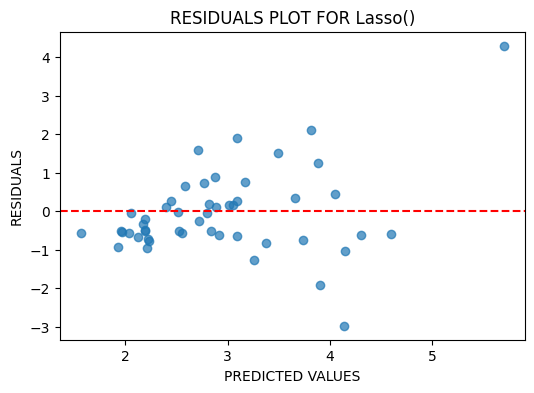

In [170]:
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Lasso Regression:")
print(f"  MAE: {mae:.4f}")
print(f"  MSE: {mse:.4f}")
print(f"  R2 Score: {r2:.4f}\n")

residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("PREDICTED VALUES")
plt.ylabel("RESIDUALS")
plt.title(f"RESIDUALS PLOT FOR {model}")
plt.show()

**DECISION TREE REGRESSION**

Decision Tree Regression:
  MAE: 1.0286
  MSE: 1.9515
  R2 Score: 0.1990



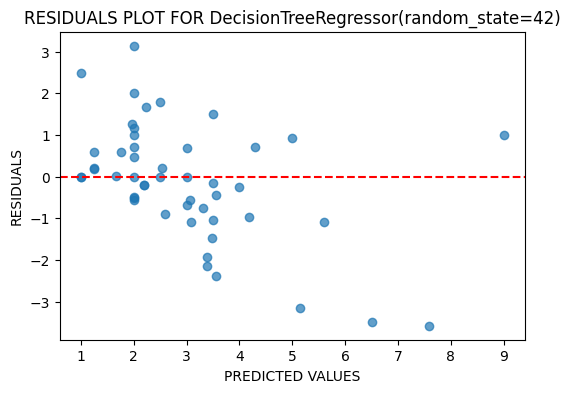

In [171]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regression:")
print(f"  MAE: {mae:.4f}")
print(f"  MSE: {mse:.4f}")
print(f"  R2 Score: {r2:.4f}\n")

residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("PREDICTED VALUES")
plt.ylabel("RESIDUALS")
plt.title(f"RESIDUALS PLOT FOR {model}")
plt.show()

**RANDOM FOREST REGRESSION**

Random Forest Regression:
  MAE: 0.7909
  MSE: 1.2003
  R2 Score: 0.5074



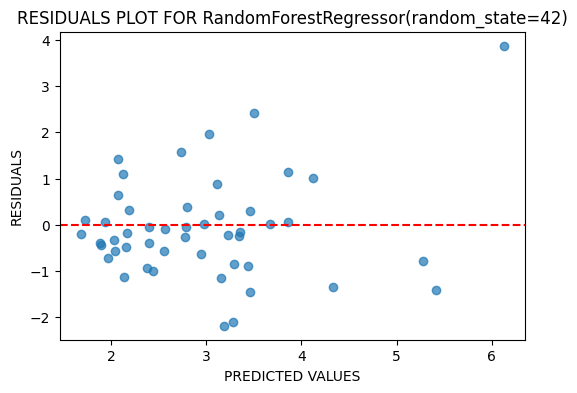

In [172]:
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression:")
print(f"  MAE: {mae:.4f}")
print(f"  MSE: {mse:.4f}")
print(f"  R2 Score: {r2:.4f}\n")

residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("PREDICTED VALUES")
plt.ylabel("RESIDUALS")
plt.title(f"RESIDUALS PLOT FOR {model}")
plt.show()

**SUPPORT VECTOR REGRESSION (SVR)**

Support Vector Regression (SVR):
  MAE: 0.7809
  MSE: 1.5617
  R2 Score: 0.3590



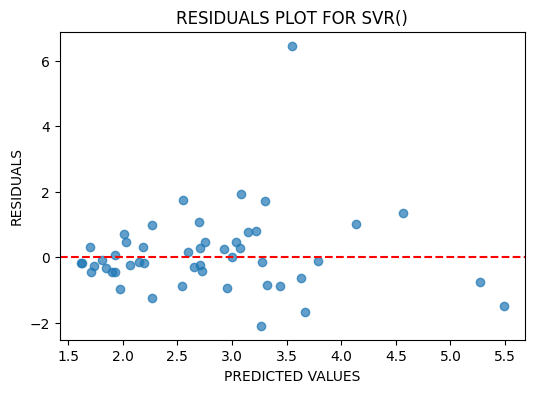

In [173]:
model = SVR()
model.fit(X_train_scaled, y_train)  # Use scaled data
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Support Vector Regression (SVR):")
print(f"  MAE: {mae:.4f}")
print(f"  MSE: {mse:.4f}")
print(f"  R2 Score: {r2:.4f}\n")

residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("PREDICTED VALUES")
plt.ylabel("RESIDUALS")
plt.title(f"RESIDUALS PLOT FOR {model}")
plt.show()

**K-NEAREST NEIGHBOURS REGRESSION**

K-Nearest Neighbors Regression (KNN):
  MAE: 0.8363
  MSE: 1.7334
  R2 Score: 0.2886



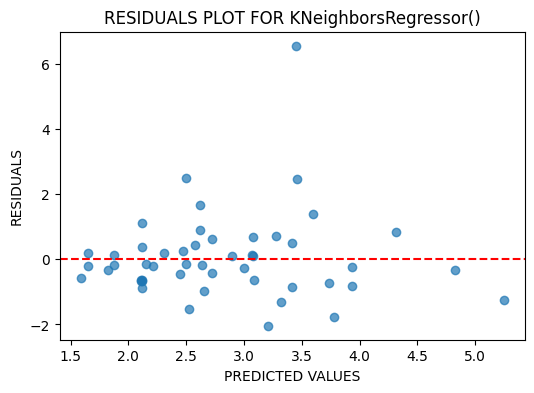

In [174]:
model = KNeighborsRegressor()
model.fit(X_train_scaled, y_train)  # Use scaled data
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("K-Nearest Neighbors Regression (KNN):")
print(f"  MAE: {mae:.4f}")
print(f"  MSE: {mse:.4f}")
print(f"  R2 Score: {r2:.4f}\n")

residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("PREDICTED VALUES")
plt.ylabel("RESIDUALS")
plt.title(f"RESIDUALS PLOT FOR {model}")
plt.show()

**HYPERPARAMETER TUNING**

In [188]:
# Linear Regression (no hyperparameters to tune)
linear_model = LinearRegression()

# Ridge Regression
param_grid_ridge = {'alpha': [0.1, 1, 10, 100]}
ridge = Ridge()

# Lasso Regression
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso = Lasso()

# Decision Tree Regressor
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
tree = DecisionTreeRegressor(random_state=42)

# Random Forest Regressor
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=42)

# Support Vector Regressor (SVR)
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf']
}
svr = SVR()

# K-Nearest Neighbors Regressor
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}
knn = KNeighborsRegressor()

In [189]:
# Grid search objects for each model
grid_ridge = GridSearchCV(ridge, param_grid_ridge, scoring='r2', cv=5)
grid_lasso = GridSearchCV(lasso, param_grid_lasso, scoring='r2', cv=5)
grid_tree = GridSearchCV(tree, param_grid_tree, scoring='r2', cv=5)
grid_rf = GridSearchCV(rf, param_grid_rf, scoring='r2', cv=5)
grid_svr = GridSearchCV(svr, param_grid_svr, scoring='r2', cv=5)
grid_knn = GridSearchCV(knn, param_grid_knn, scoring='r2', cv=5)

In [190]:
# Linear Regression (fit directly without tuning)
linear_model.fit(X_train, y_train)

# Fit each model with hyperparameter tuning
grid_ridge.fit(X_train, y_train)
grid_lasso.fit(X_train, y_train)
grid_tree.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_svr.fit(X_train, y_train)
grid_knn.fit(X_train, y_train)

# Get best models
ridge_best = grid_ridge.best_estimator_
lasso_best = grid_lasso.best_estimator_
tree_best = grid_tree.best_estimator_
rf_best = grid_rf.best_estimator_
svr_best = grid_svr.best_estimator_
knn_best = grid_knn.best_estimator_

In [191]:
# Linear Regression
y_pred_linear = linear_model.predict(X_test)
print("Linear Regression R2:", r2_score(y_test, y_pred_linear))

# Ridge Regression
y_pred_ridge = ridge_best.predict(X_test)
print("Ridge Regression R2:", r2_score(y_test, y_pred_ridge))

# Lasso Regression
y_pred_lasso = lasso_best.predict(X_test)
print("Lasso Regression R2:", r2_score(y_test, y_pred_lasso))

# Decision Tree Regression
y_pred_tree = tree_best.predict(X_test)
print("Decision Tree Regression R2:", r2_score(y_test, y_pred_tree))

# Random Forest Regression
y_pred_rf = rf_best.predict(X_test)
print("Random Forest Regression R2:", r2_score(y_test, y_pred_rf))

# Support Vector Regression (SVR)
y_pred_svr = svr_best.predict(X_test)
print("SVR R2:", r2_score(y_test, y_pred_svr))

# K-Nearest Neighbors Regression
y_pred_knn = knn_best.predict(X_test)
print("KNN Regression R2:", r2_score(y_test, y_pred_knn))

Linear Regression R2: 0.5200756159874647
Ridge Regression R2: 0.5273467962950943
Lasso Regression R2: 0.5267075224145781
Decision Tree Regression R2: 0.25151934527016384
Random Forest Regression R2: 0.5203043699576549
SVR R2: 0.5849843142328046
KNN Regression R2: 0.381101144959608


**BEST MODEL**

In [192]:
r2_scores = {
    'Linear Regression': r2_score(y_test, y_pred_linear),
    'Ridge Regression': r2_score(y_test, y_pred_ridge),
    'Lasso Regression': r2_score(y_test, y_pred_lasso),
    'Decision Tree Regression': r2_score(y_test, y_pred_tree),
    'Random Forest Regression': r2_score(y_test, y_pred_rf),
    'SVR': r2_score(y_test, y_pred_svr),
    'KNN Regression': r2_score(y_test, y_pred_knn)
}

# Find the model with the highest R2 score
best_model = max(r2_scores, key=r2_scores.get)
best_r2 = r2_scores[best_model]

print(f"Best Model: {best_model}")
print(f"Best R2 Score: {best_r2}")

Best Model: SVR
Best R2 Score: 0.5849843142328046


# DATA VISUALISATION

**RAINBOW TEST**

Rainbow Test Statistic: 1.2878865076909503
Rainbow Test p-value: 0.08618725178878854
The data likely follows a linear trend (p-value > 0.05).


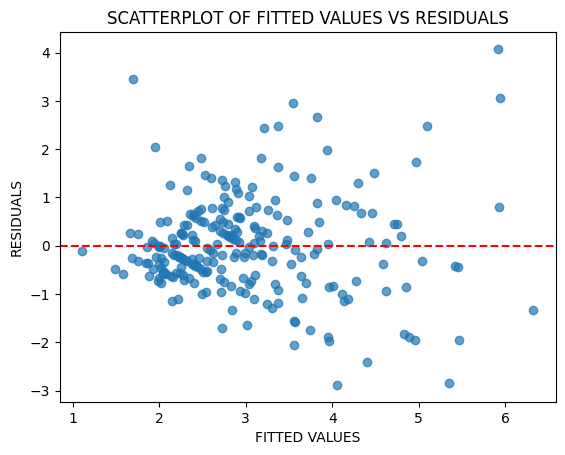

In [175]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

# Add a constant to the features (required for OLS)
X = sm.add_constant(X)

# Fit an OLS model
ols_model = sm.OLS(y, X).fit()

# Perform the Rainbow test for linearity
rainbow_stat, rainbow_p_val = linear_rainbow(ols_model)
print("Rainbow Test Statistic:", rainbow_stat)
print("Rainbow Test p-value:", rainbow_p_val)

# Interpret the result
if rainbow_p_val > 0.05:
    print("The data likely follows a linear trend (p-value > 0.05).")
else:
    print("The data does not follow a linear trend (p-value < 0.05), consider a non-linear model.")

fitted_vals = ols_model.fittedvalues
residuals = ols_model.resid

plt.scatter(fitted_vals, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("FITTED VALUES")
plt.ylabel("RESIDUALS")
plt.title("SCATTERPLOT OF FITTED VALUES VS RESIDUALS")
plt.show()

*It has been found that the data likely follows a linear trend since p-value > 0.05.*

**SCATTER PLOT OF TOTAL BILL VS TIP**

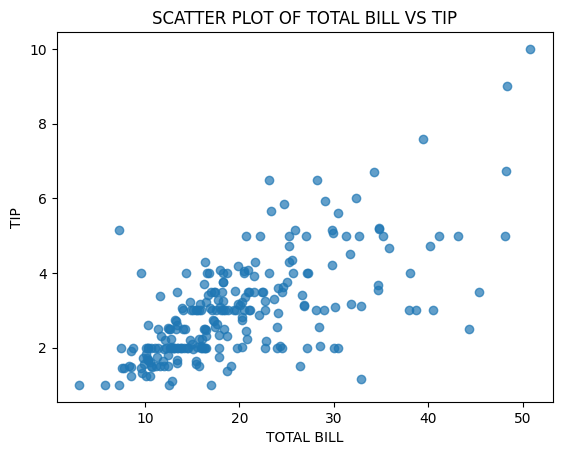

In [176]:
plt.scatter(df['total_bill'], df['tip'], alpha=0.7)
plt.xlabel('TOTAL BILL')
plt.ylabel('TIP')
plt.title('SCATTER PLOT OF TOTAL BILL VS TIP')
plt.show()

*There is an approximate linear trend, especially for lower values of total bill.*

**BOX PLOT OF DAY VS TIP**

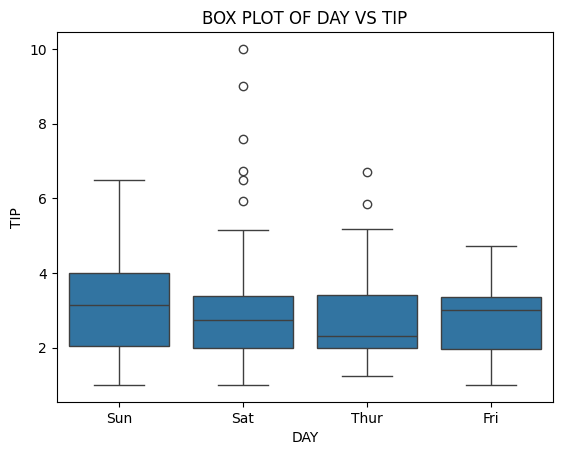

In [177]:
sns.boxplot(x='day', y='tip', data=data)
plt.xlabel('DAY')
plt.ylabel('TIP')
plt.title('BOX PLOT OF DAY VS TIP')
plt.show()

*Maximum amount of tips are on Sundays.*

**LINEPLOT OF DAY VS AVERAGE TIP**

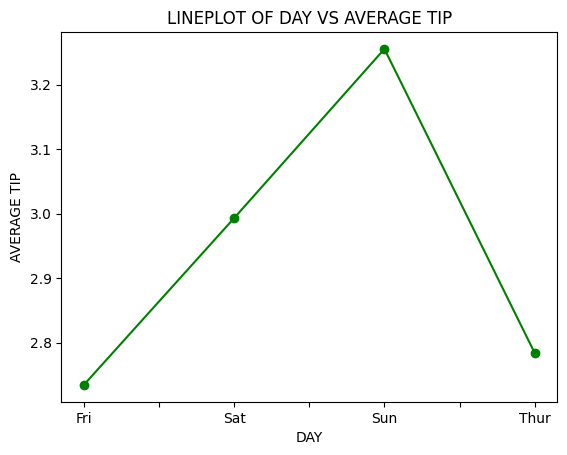

In [178]:
average_tips_by_day = data.groupby('day')['tip'].mean()
average_tips_by_day.plot(kind='line', marker='o', color='green')
plt.xlabel('DAY')
plt.ylabel('AVERAGE TIP')
plt.title('LINEPLOT OF DAY VS AVERAGE TIP')
plt.show()

**BOXPLOT OF TIME VS TIP**

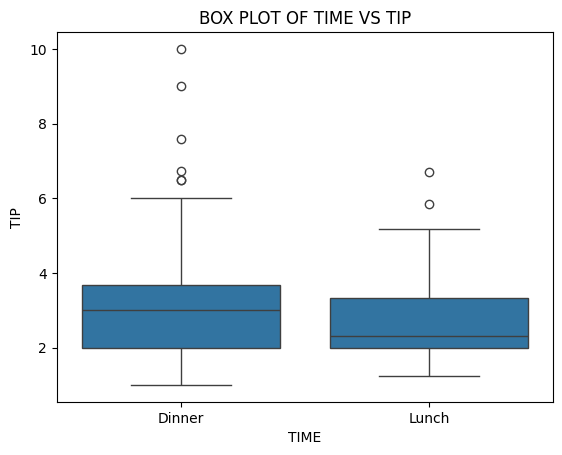

In [179]:
sns.boxplot(x='time', y='tip', data=data)
plt.xlabel('TIME')
plt.ylabel('TIP')
plt.title('BOX PLOT OF TIME VS TIP')
plt.show()

*More amount of tips are obtained during dinner timings.*

---



**VIOLIN PLOT OF SEX VS TIP**

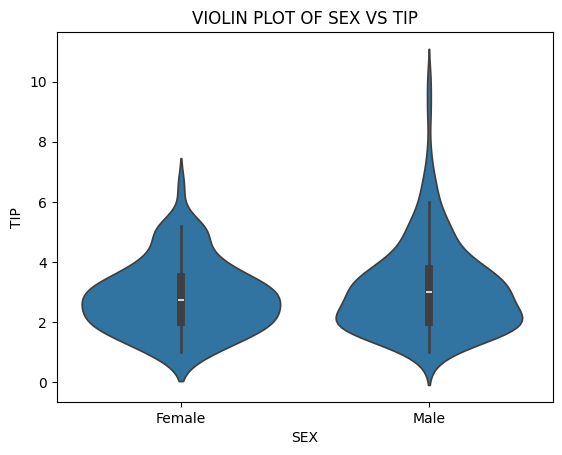

In [180]:
sns.violinplot(x='sex', y='tip', data=data)
plt.xlabel('SEX')
plt.ylabel('TIP')
plt.title('VIOLIN PLOT OF SEX VS TIP')
plt.show()

*Males and females tend to tip almost the same amount on average, although males sometimes tip a larger amount.*

**VIOLIN PLOT OF SMOKER VS TIP**

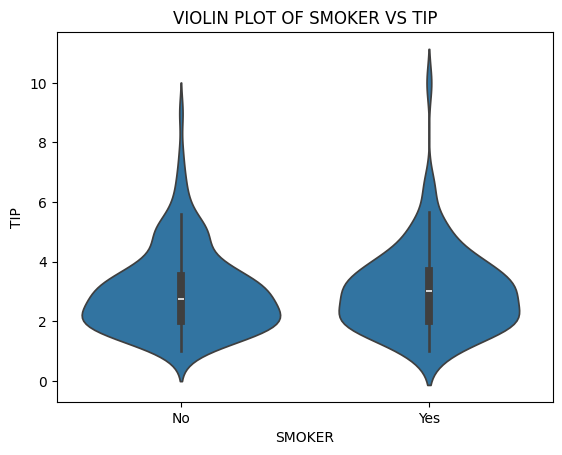

In [181]:
sns.violinplot(x='smoker', y='tip', data=data)
plt.xlabel('SMOKER')
plt.ylabel('TIP')
plt.title('VIOLIN PLOT OF SMOKER VS TIP')
plt.show()

*Smokers and Non-smokers almost tip the same amount.*

**HEATMAP**

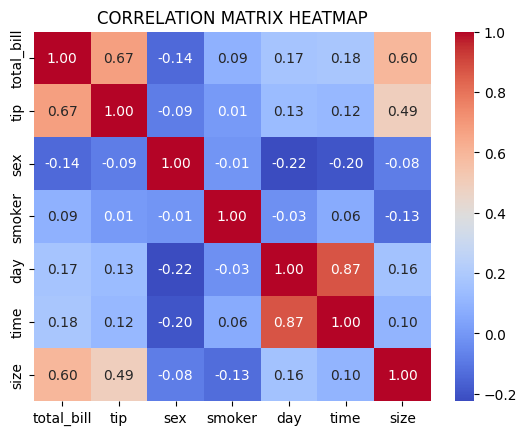

In [182]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("CORRELATION MATRIX HEATMAP")
plt.show()

*There is a significant positive correlation of tip with total bill and size. There is also slight correlation of tip with day and time.*

**PAIRPLOT**

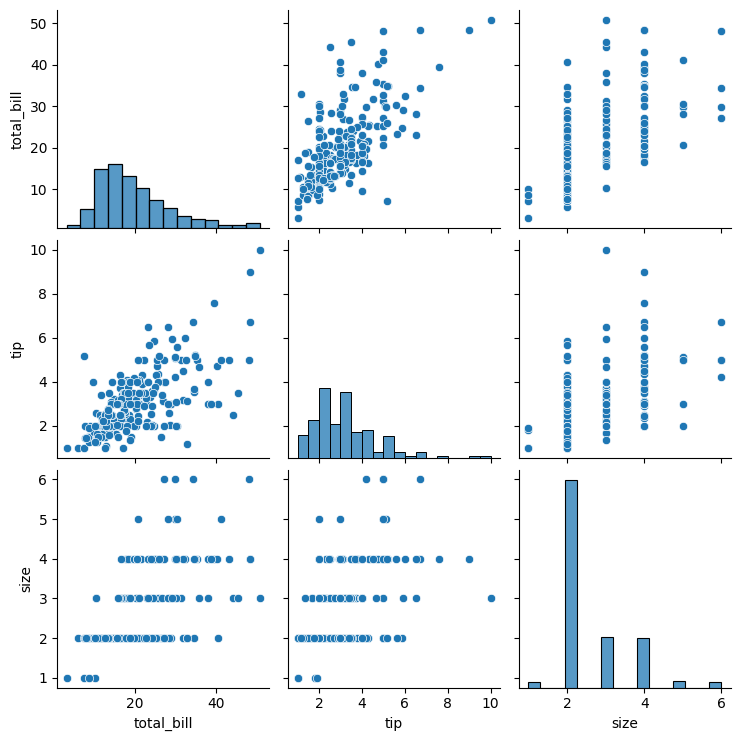

In [183]:
sns.pairplot(data)
plt.show()

# CONCLUSION

**POINTS TO NOTE**

1. Higher the total bill amount, higher is the tip amount.
2. More the number of people ordering in a group, more is the tip amount.
2. More amount of tips are obtained on Sundays.
3. More amount of tips are obtained during dinner timings.

**STRATEGIES**

1. Since total bill correlates with tip, offer add-ons or pairings for meals (like wine, premium ingredients, or extra sides) that can raise the bill amount per order. Encourage guests to spend more by providing incentives, like discounts or points on the next visit, for reaching a certain bill threshold.

2. Since size significantly impacts tips, consider adjusting service levels (e.g., more attentive service for larger groups). Feature group platters or sharing options that cater to larger parties. This could encourage higher spending, leading to bigger tips.

3. Since Sundays yield the highest tips, ensure adequate staffing to maintain quick service, handle larger groups, and provide excellent customer service. Offer special menu items or promotions exclusive to Sundays. This could attract larger groups, potentially increasing total bill amounts and tipping.

4. Market the venue as a spot for birthdays, celebrations, or gatherings, especially on weekends. This encourages larger groups, larger spending and thus larger tip amounts.

5. Ensure that servers are trained to provide excellent customer service, as building rapport can increase tipping behavior. By prompting guests for feedback on service, customers might be more likely to leave higher tips if they feel heard and valued.